In [1]:
import numpy as np
from scipy.optimize import fsolve
import sympy as sp

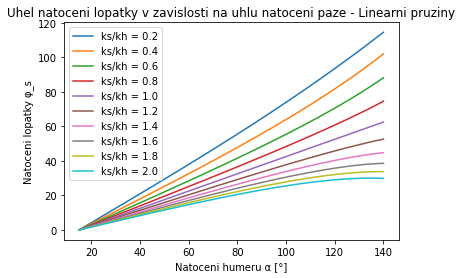

In [2]:
## linearni pruzina odvozena rucne
def func(x, alfa,pomery):
    a = 1
    b = 1
    c = 1
    d = 1
    phi0 = 15*np.pi/180
    return -pomery*a*b*np.sin(x)+c*d*np.sin(alfa-x-phi0) #pomery = ks/kh

N = 100
NG = 10
alfavec_graf = np.linspace(0*np.pi/180,90*np.pi/180,N)
alfavec = np.linspace(15*np.pi/180,140*np.pi/180,N)
phisvec = np.zeros((N,NG))
min_pomer = 0.2
max_pomer = 2
pomery = np.linspace(min_pomer,max_pomer,NG)
for j in range(NG):
    for i in range(N):
        phisvec[i,j] = fsolve(func, [1], args=(alfavec[i],pomery[j]))

import numpy as np
import matplotlib.pyplot as plt
alfavec = alfavec*180/np.pi
alfavec_graf = alfavec_graf*180/np.pi
phisvec = phisvec*180/np.pi
# plt.plot(alfavec, phisvec)
# plt.show()

plt.figure()    
for i in range(NG):
    plt.plot(alfavec,phisvec[:,i],label='ks/kh = %s' % round(pomery[i],2))
plt.xlabel("Natoceni humeru \u03B1 [°]")
plt.ylabel("Natoceni lopatky \u03C6_s")
plt.rcParams['figure.figsize'] = [9.4,4.8]
plt.title('Uhel natoceni lopatky v zavislosti na uhlu natoceni paze - Linearni pruziny')
plt.legend()
plt.savefig("Linear.jpg")
plt.show()


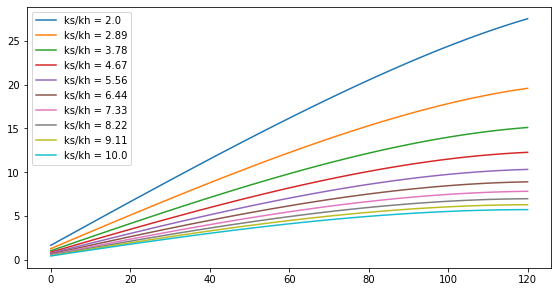

In [3]:
#linearni pruzina odvozena pomoci sympy
phis,alfa,pomery = sp.symbols('phis,alfa,pomery')
a = 1
b = 1
c = 1
d = 1
phi0 = 15*np.pi/180
phih = alfa-phi0-phis
kh = 1
ks = kh*pomery
xs = sp.sqrt(a**2+b**2-2*a*b*sp.cos(phis))
xh = sp.sqrt(c**2+d**2-2*c*d*sp.cos(phih))
Uc = 1/2*ks*xs**2+1/2*kh*xh**2
dUc = sp.diff(Uc,phis)
eq = sp.lambdify([phis,alfa,pomery], dUc, 'numpy')

N = 100
NG = 10
alfavec_graf = np.linspace(0*np.pi/180,120*np.pi/180,N)
alfavec = np.linspace(20*np.pi/180,110*np.pi/180,N)
phisvec = np.zeros((N,NG))
min_pomer = 2
max_pomer = 10
pomery = np.linspace(min_pomer,max_pomer,NG)
for j in range(NG):
    for i in range(N):
        def fun_root(x):
            return eq(x,alfavec[i],pomery[j])
        phisvec[i,j] = fsolve(fun_root, [1])

import numpy as np
import matplotlib.pyplot as plt
alfavec = alfavec*180/np.pi
alfavec_graf = alfavec_graf*180/np.pi
phisvec = phisvec*180/np.pi
# plt.plot(alfavec, phisvec)
# plt.show()

plt.figure()    
for i in range(NG):
    plt.plot(alfavec_graf,phisvec[:,i],label='ks/kh = %s' % round(pomery[i],2))
plt.legend()
plt.show()



In [4]:
# #nelilinearni pruzina odvozena pomoci sympy bez l0
phis,alfa,pomery = sp.symbols('phis,alfa,pomery')
# a = 10
# b = 10
# c = 10
# d = 10

#########################################
a = 1
b = 1
c = 1
d = 1
phis,alfa,pomery,xs,xh = sp.symbols('phis,alfa,pomery,xs,xh')
kh = 1
ks = kh*pomery
koefs = 1
koefh = 1
Fs = ks*xs**(koefs)
Fh = kh*xh**(koefh)
Us = sp.integrate(Fs,(xs,0,xs))
Uh = sp.integrate(Fh,(xh,0,xh))
xsf = sp.sqrt(a**2+b**2-2*a*b*sp.cos(phis))
xhf = sp.sqrt(c**2+d**2-2*c*d*sp.cos(phih))
Us = Us.subs(xs,xsf)
Uh = Uh.subs(xh,xhf)
Uc = Us+Uh
dUc = sp.diff(Uc,phis)
eq = sp.lambdify([phis,alfa,pomery], dUc, 'numpy')
#########################################

# a = 1
# b = 1
# c = 1
# d = 1
# phi0 = 0*np.pi/180
# phih = alfa-phis-phi0 #chybi phi0
# l0=0
# kh = 1
# ks = kh*pomery
# xs = sp.sqrt(a**2+b**2-2*a*b*sp.cos(phis))
# xh = sp.sqrt(c**2+d**2-2*c*d*sp.cos(phih))
# koefs = 4
# koefh = 4
# Uc = (ks*(xs**(koefs+1)))/(koefs+1)+(kh*(xh**(koefh+1)))/(koefh+1) #bez l0  
# dUc = sp.diff(Uc,phis)
# eq = sp.lambdify([phis,alfa,pomery], dUc, 'numpy')
print(xs)
print(xh)
print(Uc)
print(dUc)

xs
xh
pomery*(2 - 2*cos(phis))/2 - cos(-alfa + phis + 0.261799387799149) + 1
pomery*sin(phis) + sin(-alfa + phis + 0.261799387799149)


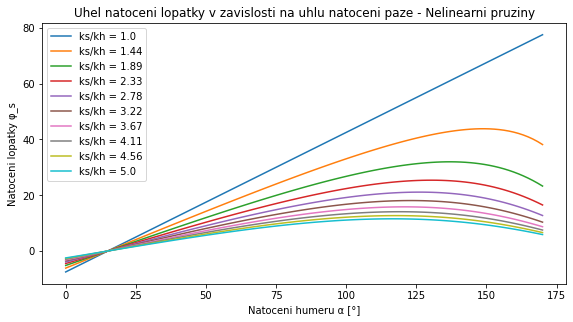

[ 0.17340919  0.12381344  0.07414967  0.02443205 -0.02532531 -0.07510834
 -0.124903   -0.17469526 -0.22447111 -0.26099443 -0.26075339 -0.26048583
 -0.26020297 -0.25991604 -0.25963626 -0.25937487 -0.25914313 -0.2589523
 -0.25881368 -0.25873861 -0.25873844 -0.25882458 -0.25900847 -0.2593016
 -0.25971552 -0.26026181 -0.26095213 -0.26179821 -0.26281182 -0.26400482
 -0.26538913 -0.26697675 -0.26877974 -0.27081027 -0.27308055 -0.27560291
 -0.27838973 -0.2814535  -0.28480675 -0.28846213 -0.29243236 -0.29673021
 -0.30136856 -0.30636033 -0.31171852 -0.31745619 -0.32358643 -0.33012241
 -0.3370773  -0.34446431 -0.35229665 -0.36058756 -0.36935022 -0.37859781
 -0.38834344 -0.39860016 -0.4093809  -0.42069849 -0.43256562 -0.44499477
 -0.45799823 -0.47158805 -0.48577596 -0.5005734  -0.51599141 -0.53204063
 -0.54873122 -0.56607281 -0.58407444 -0.60274451 -0.62209071 -0.64211992
 -0.6628382  -0.68425065 -0.70636135 -0.72917331 -0.75268833 -0.77690694
 -0.80182831 -0.82745014 -0.85376859 -0.88077815 -0.9

In [5]:
def forces_EQ(alfa,phisfcn,koefs,koefh,pomeryfcn):
    a = 1
    b = 1
    c = 1
    d = 1
    phi0 = 0*np.pi/180
    phih = alfa-phisfcn-phi0 #chybi phi0
    kh = 1
    ks = kh*pomeryfcn
    xs = np.sqrt(a**2+b**2-2*a*b*np.cos(phisfcn))
    xh = np.sqrt(c**2+d**2-2*c*d*np.cos(phih))
    Fs = ks*(xs**koefs)
    Fh = kh*(xh**koefh)
    eq = Fs-Fh
    return eq
def forces_FS(alfa,phisfcn,koefs,koefh,pomeryfcn):
    a = 1
    b = 1
    c = 1
    d = 1
    phi0 = 0*np.pi/180
    phih = alfa-phisfcn-phi0 #chybi phi0
    kh = 1
    ks = kh*pomeryfcn
    xs = np.sqrt(a**2+b**2-2*a*b*np.cos(phisfcn))
    xh = np.sqrt(c**2+d**2-2*c*d*np.cos(phih))
    Fs = ks*(xs**koefs)
    Fh = kh*(xh**koefh)
    eq = Fs-Fh
    return Fs


N = 100
NG = 10
alfa_start = 0*np.pi/180
alfa_end = 170*np.pi/180

alfavec = np.linspace(alfa_start,alfa_end,N)
phisvec = np.zeros((N,NG))
lsvec = np.zeros((N,NG))
min_pomer = 1
max_pomer = 5
pomery = np.linspace(min_pomer,max_pomer,NG)
control = np.zeros((N,NG))
root = 0.2
for j in range(NG):
    for i in range(N):
        def fun_root(x):
            return eq(x,alfavec[i],pomery[j])
        root = fsolve(fun_root, 0.9,xtol=1.49012e-8)
        phisvec[i,j] = root
        control[i,j] = np.isclose(fun_root(phisvec[i,j]), [0])

forces_eq = np.zeros(N)
forces_Fs = np.zeros(N)
k = 9
for i in range(N):
    forces_eq[i] = forces_EQ(alfavec[i],phisvec[i,k],koefs,koefh,pomery[k])
    forces_Fs[i] = forces_FS(alfavec[i],phisvec[i,k],koefs,koefh,pomery[k]) 
import numpy as np
import matplotlib.pyplot as plt
alfavec = alfavec*180/np.pi
phisvec = phisvec*180/np.pi
# plt.plot(alfavec, phisvec)
# plt.show()

plt.figure()    
for i in range(NG):
    plt.plot(alfavec,phisvec[:,i],label='ks/kh = %s' % round(pomery[i],2))
plt.legend()
plt.xlabel("Natoceni humeru \u03B1 [°]")
plt.ylabel("Natoceni lopatky \u03C6_s")
plt.legend()
plt.rcParams['figure.figsize'] = [9.4,4.8]
plt.title('Uhel natoceni lopatky v zavislosti na uhlu natoceni paze - Nelinearni pruziny')
# plt.savefig("Nonlinear.jpg")
plt.show()
print(forces_eq)
print(forces_Fs)
print(control)

<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in true_divide
  return -l0*pomery*sin(phis)/sqrt(2 - 2*cos(phis)) + l0*sin(alfa - phis)/sqrt(2 - 2*cos(alfa - phis)) + pomery*(l0 + sqrt(2 - 2*cos(phis)))*sin(phis)/sqrt(2 - 2*cos(phis)) - (l0 + sqrt(2 - 2*cos(alfa - phis)))*sin(alfa - phis)/sqrt(2 - 2*cos(alfa - phis))
C:\Users\zoufi\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


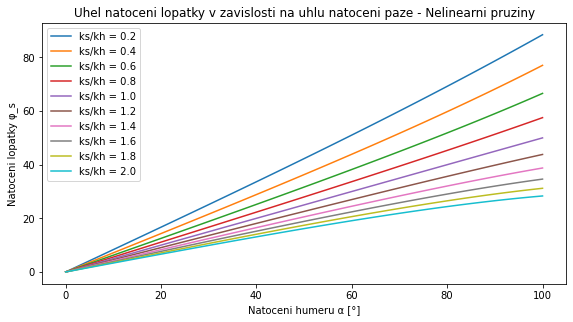

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1.

In [6]:
### nelinearni pruzina, sympy odvozeni Uc i dUc
phis,alfa,pomery,l0,x = sp.symbols('phis,alfa,pomery,l0,x')
kh = 1
ks = kh*pomery
Fs = ks*(x-l0)**(1)
Fh = kh*(x-l0)**(1)
a = 1
b = 1
c = 1
d = 1
phi0 = 0*np.pi/180
phih = alfa-phi0-phis
Us = sp.integrate(Fs,(x,l0,x+l0))
Uh = sp.integrate(Fh,(x,l0,x+l0))
xs = sp.sqrt(a**2+b**2-2*a*b*sp.cos(phis))
xh = sp.sqrt(c**2+d**2-2*c*d*sp.cos(phih))
Us = Us.subs(x,xs)
Uh = Uh.subs(x,xh)
Uc = Us+Uh
dUc = sp.diff(Uc,phis)
eq = sp.lambdify([phis,alfa,pomery,l0], dUc, 'numpy')



N = 100
NG = 10
alfa_start = 0*np.pi/180
alfa_end = 100*np.pi/180

alfavec_graf = np.linspace(alfa_start,alfa_end,N)
alfavec = np.linspace(alfa_start,alfa_end,N)
phisvec = np.zeros((N,NG))
min_pomer = 0.2
max_pomer = 2
pomery = np.linspace(min_pomer,max_pomer,NG)
control = np.zeros((N,NG))
for j in range(NG):
    for i in range(N):
        def fun_root(x):
            return eq(x,alfavec[i],pomery[j],0)
        phisvec[i,j] = fsolve(fun_root, [0.9])
        control[i,j] = np.isclose(fun_root(phisvec[i,j]), [0])

import numpy as np
import matplotlib.pyplot as plt
alfavec = alfavec*180/np.pi
alfavec_graf = alfavec_graf*180/np.pi
phisvec = phisvec*180/np.pi
# plt.plot(alfavec, phisvec)
# plt.show()

plt.figure()    
for i in range(NG):
    plt.plot(alfavec_graf,phisvec[:,i],label='ks/kh = %s' % round(pomery[i],2))
plt.xlabel("Natoceni humeru \u03B1 [°]")
plt.ylabel("Natoceni lopatky \u03C6_s")
plt.legend()
plt.rcParams['figure.figsize'] = [9.4,4.8]
plt.title('Uhel natoceni lopatky v zavislosti na uhlu natoceni paze - Nelinearni pruziny')
plt.savefig("Nonlinear.jpg")
plt.show()
print(control)

In [7]:
import numpy as np
from scipy.optimize import fsolve

# Definice rovnice
def equation(phi, p, alpha):
    return p * np.sin(phi) - np.sin(alpha - phi)

# Rozmezí pro alpha (0 až 2π)
alpha_range = np.linspace(0, np.pi, 100)
p=1
# Pro každou hodnotu alpha najdeme odpovídající hodnoty phi pro různá p
for alpha in alpha_range:
        initial_guess = 1  # Počáteční odhad pro phi
        solution = fsolve(equation, initial_guess, args=(p, alpha))
        
        # Výsledky pro dané alpha a p
        print(f"alpha = {alpha}, p = {p}, phi = {solution}")


alpha = 0.0, p = 1, phi = [0.]
alpha = 0.03173325912716963, p = 1, phi = [0.01586663]
alpha = 0.06346651825433926, p = 1, phi = [0.03173326]
alpha = 0.0951997773815089, p = 1, phi = [0.04759989]
alpha = 0.12693303650867852, p = 1, phi = [0.06346652]
alpha = 0.15866629563584814, p = 1, phi = [0.07933315]
alpha = 0.1903995547630178, p = 1, phi = [0.09519978]
alpha = 0.2221328138901874, p = 1, phi = [0.11106641]
alpha = 0.25386607301735703, p = 1, phi = [0.12693304]
alpha = 0.28559933214452665, p = 1, phi = [0.14279967]
alpha = 0.3173325912716963, p = 1, phi = [0.1586663]
alpha = 0.3490658503988659, p = 1, phi = [0.17453293]
alpha = 0.3807991095260356, p = 1, phi = [0.19039955]
alpha = 0.4125323686532052, p = 1, phi = [0.20626618]
alpha = 0.4442656277803748, p = 1, phi = [0.22213281]
alpha = 0.47599888690754444, p = 1, phi = [0.23799944]
alpha = 0.5077321460347141, p = 1, phi = [0.25386607]
alpha = 0.5394654051618837, p = 1, phi = [0.2697327]
alpha = 0.5711986642890533, p = 1, phi = [0.28

### 